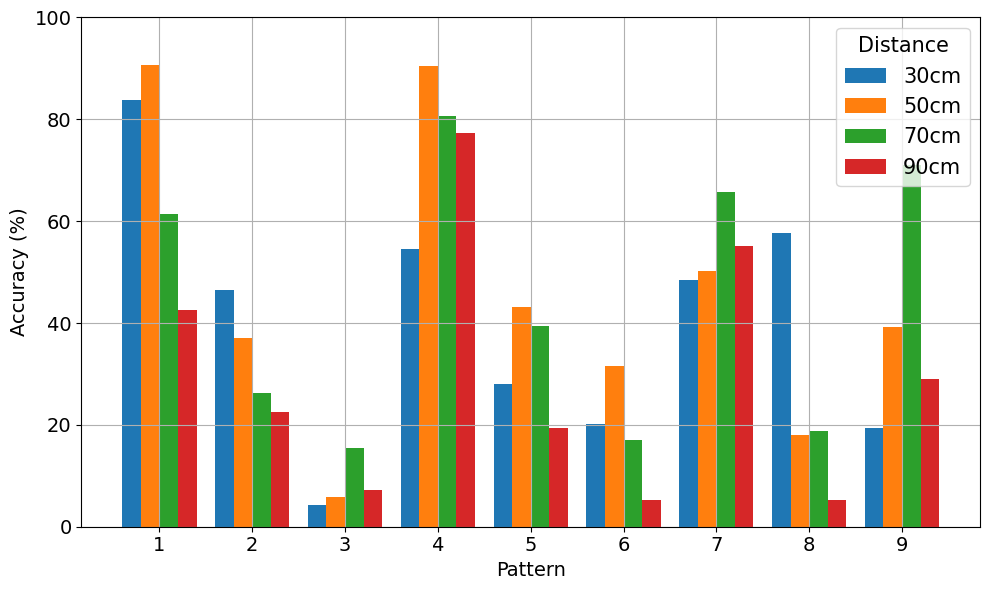

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define filenames and distances
files_bright = {
    '30cm': 'data/Bright/detection_log_D30_bright.csv',
    '50cm': 'data/Bright/detection_log_D50_bright.csv',
    '70cm': 'data/Bright/detection_log_D70_bright.csv',
    '90cm': 'data/Bright/detection_log_D90_bright.csv'
}

files_medium = {
    '30cm': 'data/Bright/detection_log_D30_bright.csv',
    '50cm': 'data/Bright/detection_log_D50_bright.csv',
    '70cm': 'data/Bright/detection_log_D70_bright.csv',
    '90cm': 'data/Bright/detection_log_D90_bright.csv'
}

files_low = {
    '30cm': 'data/Bright/detection_log_D30_bright.csv',
    '50cm': 'data/Bright/detection_log_D50_bright.csv',
    '70cm': 'data/Bright/detection_log_D70_bright.csv',
    '90cm': 'data/Bright/detection_log_D90_bright.csv'
}

bar_width = 0.2
pattern_ids = list(range(1, 10))
x = np.arange(len(pattern_ids))

plt.figure(figsize=(10, 6))

for i, (label, path) in enumerate(files_bright.items()):
    df = pd.read_csv(path)
    df['Pattern'] = df['Pattern'].astype(str).str.zfill(2)  # Ensure '01', '02' format
    df['Pattern'] = df['Pattern'].astype(int)               # Convert to integer 1–9
    values = df.set_index('Pattern').loc[pattern_ids]['Accuracy (%)']
    plt.bar(x + i * bar_width, values, width=bar_width, label=label)

plt.xlabel("Pattern", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xticks(x + bar_width * 1.5, pattern_ids, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 100)
plt.legend(title="Distance", fontsize=15, title_fontsize=15)
plt.tight_layout()
plt.grid()
plt.show()

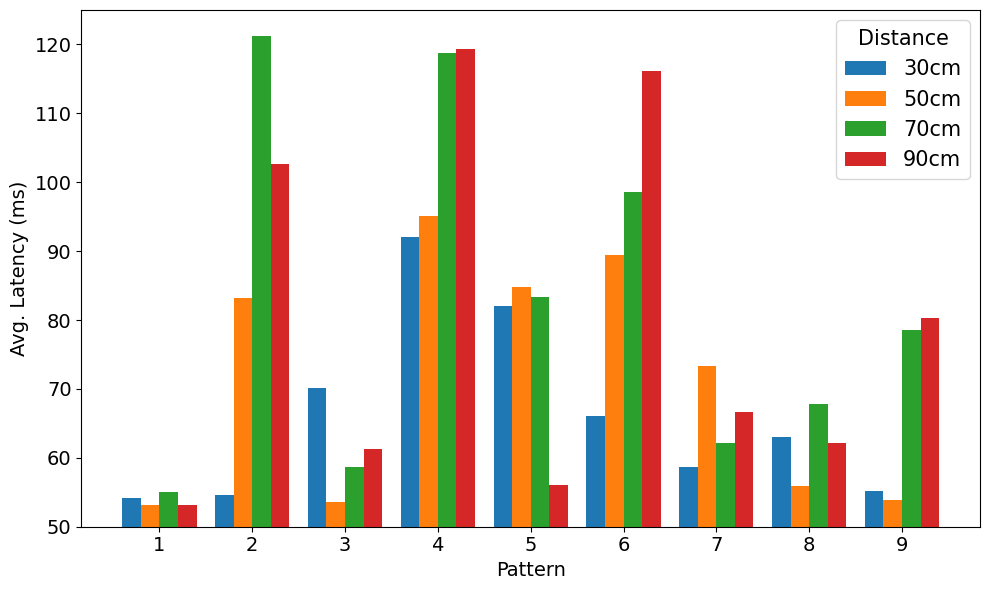

In [35]:
plt.figure(figsize=(10, 6))

for i, (label, path) in enumerate(files_bright.items()):
    df = pd.read_csv(path)
    df['Pattern'] = df['Pattern'].astype(str).str.zfill(2)
    df['Pattern'] = df['Pattern'].astype(int)
    values = df.set_index('Pattern').loc[pattern_ids]['Avg Latency (ms)']
    plt.bar(x + i * bar_width, values, width=bar_width, label=label)

plt.xlabel("Pattern", fontsize=14)
plt.ylabel("Avg. Latency (ms)", fontsize=14)
plt.xticks(x + bar_width * 1.5, pattern_ids, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(50, 125)
plt.legend(title="Distance", fontsize=15, title_fontsize=15)
plt.tight_layout()
plt.show()

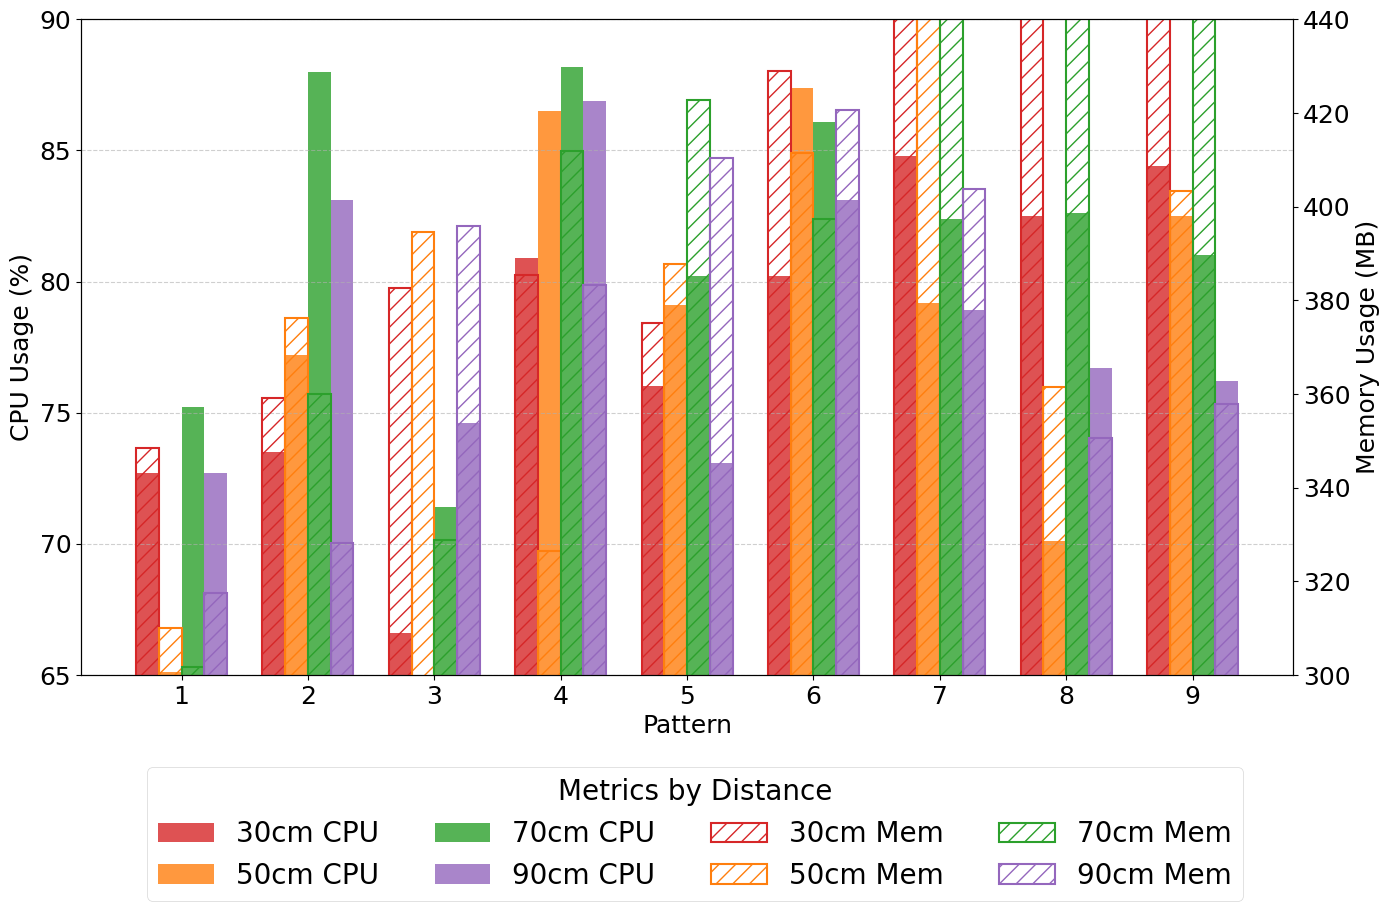

In [36]:
# Pattern indices
patterns = list(range(1, 10))
x = np.arange(len(patterns))
bar_w = 0.18

# Colors/hatching
cpu_colors = ['#d62728', '#ff7f0e', '#2ca02c', '#9467bd']
mem_hatches = ['//','//','//','//']

# Font sizes
LABEL_SIZE = 18
TICK_SIZE  = 18
LEGEND_SIZE = 20
LEGEND_TITLE = 20

# 2) Create figure
fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()

# 3) Plot bars
for i, (label, path) in enumerate(files_bright.items()):
    df = pd.read_csv(path)
    df['Pattern'] = df['Pattern'].astype(str).str.zfill(2).astype(int)
    df.set_index('Pattern', inplace=True)
    cpu_vals = df.loc[patterns]['Avg CPU (%)']
    mem_vals = df.loc[patterns]['Avg Memory (MB)']
    offset = (i - 1.5) * bar_w

    # CPU
    ax1.bar(x + offset, cpu_vals, width=bar_w,
            color=cpu_colors[i], alpha=0.8,
            label=f'{label} CPU')
    # Memory
    ax2.bar(x + offset, mem_vals, width=bar_w,
            fill=False, edgecolor=cpu_colors[i],
            hatch=mem_hatches[i], linewidth=1.5,
            label=f'{label} Mem')

# 4) Labels & ticks
ax1.set_xlabel('Pattern', fontsize=LABEL_SIZE)
ax1.set_ylabel('CPU Usage (%)', fontsize=LABEL_SIZE)
ax2.set_ylabel('Memory Usage (MB)', fontsize=LABEL_SIZE)

ax1.set_xticks(x)
ax1.set_xticklabels(patterns, fontsize=TICK_SIZE)
ax1.set_yticks(np.arange(65, 91, 5))
ax1.tick_params(axis='y', labelsize=TICK_SIZE)
ax2.tick_params(axis='y', labelsize=TICK_SIZE)

ax1.set_ylim(65, 90)
ax2.set_ylim(300, 440)

ax1.grid(axis='y', linestyle='--', alpha=0.6)

# 5) Legend below
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
handles, labels = h1 + h2, l1 + l2

legend = fig.legend(handles, labels,
                    loc='lower center',
                    bbox_to_anchor=(0.5, -0.15),
                    ncol=4,
                    fontsize=LEGEND_SIZE,
                    title='Metrics by Distance',
                    title_fontsize=LEGEND_TITLE)
legend.get_frame().set_linewidth(0.5)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

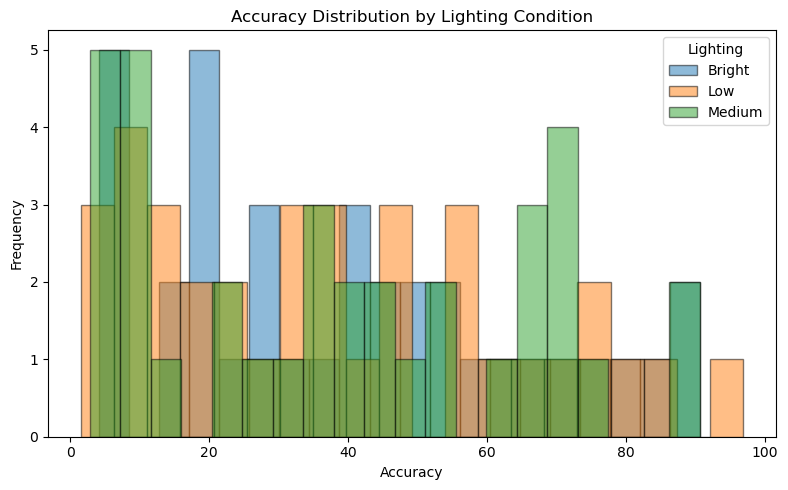

/var/folders/6m/_1t9lqvx74j3_j5bvml4rzp40000gn/T/ipykernel_3138/3675475877.py:102: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Lighting')


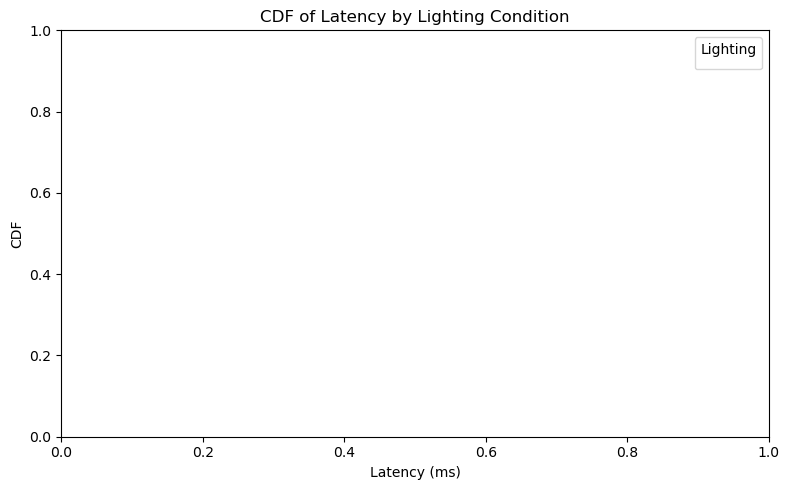

In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# — your file mappings —
files_bright = {
    '30cm': 'data/Bright/detection_log_D30_bright.csv',
    '50cm': 'data/Bright/detection_log_D50_bright.csv',
    '70cm': 'data/Bright/detection_log_D70_bright.csv',
    '90cm': 'data/Bright/detection_log_D90_bright.csv'
}

files_medium = {
    '30cm': 'data/Medium/detection_log_D30_medium.csv',
    '50cm': 'data/Medium/detection_log_D50_medium.csv',
    '70cm': 'data/Medium/detection_log_D70_medium.csv',
    '90cm': 'data/Medium/detection_log_D90_medium.csv'
}

# for now, you don’t have any real Low files — leave it empty or non-existent
files_low = {
    '30cm': 'data/Low/detection_log_D30_low.csv',
    '50cm': 'data/Low/detection_log_D50_low.csv',
    '70cm': 'data/Low/detection_log_D70_low.csv',
    '90cm': 'data/Low/detection_log_D90_low.csv'
}

def load_lighting_data(file_dict, lighting_label):
    dfs = []
    for dist_label, filepath in file_dict.items():
        if not os.path.exists(filepath):
            # skip missing files
            continue
        df = pd.read_csv(filepath)
        df['Lighting']    = lighting_label
        df['Distance_cm'] = int(dist_label.replace('cm',''))
        dfs.append(df)
    if dfs:
        return pd.concat(dfs, ignore_index=True)
    else:
        return None

# iterate through each lighting set, only concat if data was actually loaded
all_dfs = []
for label, files in [('Bright', files_bright),
                     ('Medium', files_medium),
                     ('Low', files_low)]:
    df = load_lighting_data(files, label)
    if df is not None:
        all_dfs.append(df)

all_data = pd.concat(all_dfs, ignore_index=True)

# — now plotting exactly as before —

# 1) Histogram of Accuracy by lighting
plt.figure(figsize=(8,5))
for lighting, subset in all_data.groupby('Lighting'):
    plt.hist(subset['Accuracy (%)'],
             bins=20,
             alpha=0.5,
             label=lighting,
             edgecolor='black')
plt.title('Accuracy Distribution by Lighting Condition')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend(title='Lighting')
plt.tight_layout()
plt.show()

# 2) CDF of Latency by lighting
# 3) CDF of Latency (ms) by lighting, robust to missing column names
plt.figure(figsize=(8,5))

for lighting, subset in all_data.groupby('Lighting'):
    # pick whichever latency column exists
    if 'Latency' in subset.columns:
        lat_series = subset['Latency']
    elif 'Latency_ms' in subset.columns:
        lat_series = subset['Latency_ms']
    elif 'Latency(ms)' in subset.columns:
        lat_series = subset['Latency(ms)']
    else:
        print(f"Warning: no latency column for lighting={lighting}, skipping CDF.")
        continue

    # drop any NaNs
    lat = lat_series.dropna().values
    if len(lat) == 0:
        print(f"Warning: no data points for lighting={lighting}, skipping CDF.")
        continue

    # compute and plot CDF
    lat_sorted = np.sort(lat)
    cdf        = np.arange(1, lat_sorted.size+1) / lat_sorted.size
    plt.plot(lat_sorted, cdf, label=lighting)

plt.title('CDF of Latency by Lighting Condition')
plt.xlabel('Latency (ms)')
plt.ylabel('CDF')
plt.legend(title='Lighting')
plt.tight_layout()
plt.show()